<a href="https://colab.research.google.com/github/ThuanPhong0126/Machine-Learning-from-scratch/blob/main/Principal_Component_Analysis(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Principal Component Analysis** (PCA) is a data-reduction technique that finds application in a wide variety of fields, including biology, sociology, physics, medicine, and audio processing.

Here's the preocess in a nutshell:

1. Covariance: Find the covariance matrix for dataset
2. Eigenvectors: Find the eigenvectors of that matrix
3. Ordering: Sort the eigenvectors/'dimensions' from biggest to smallesr variance
4. Projection/Data reduction: Use the eigenvectors corresponding to the largest variance to project the dataset in to a reduced-dimension space
5. (Check: How much did we lose by that truncation?)

### Covariance

In [2]:
from plotly.graph_objs import Scatter
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

N = 100
x = np.random.normal(size=N)
y = 0.5*x +0.2*(np.random.normal(size=N))

fig = go.Figure(data = [go.Scatter(x=x, y=y, mode='markers',
                                   marker=dict(size=8, opacity=0.5), name="data")])
fig.update_layout(xaxis_title='x', yaxis_title='y', yaxis=dict(scaleanchor="x", scaleratio=1))
fig.show()

In [3]:
print("Variance in x = ", np.var(x))
print("Variance in y = ", np.var(y))

Variance in x =  0.9138327830416393
Variance in y =  0.27841268714334033


Covariance indicates the level to which two variables vary together.
$${\rm Cov}(x,y) = {1\over N-1}\sum_{j=1}^N (x_j-\mu_x)(y_j-\mu_j),$$

$N-1$ was introduced to "reduce small sample bias." 

In [4]:
def covariance(a, b):
  return ( (a-a.mean() )*(b-b.mean())).sum() / (len(a)-1)

print("Covariance of x and y:", covariance(x, y))
print("Covariance of y and x:", covariance(y, x))
print("Covariance of x and x:", covariance(x, x),", variance of x: ", np.var(x))
print("Covariance of y and y:", covariance(y,y),", variance of y: ", np.var(y))

Covariance of x and y: 0.47338396492683843
Covariance of y and x: 0.47338396492683843
Covariance of x and x: 0.923063417213777 , variance of x:  0.9138327830416393
Covariance of y and y: 0.28122493650842456 , variance of y:  0.27841268714334033


#### Covariance matrix

In [7]:
data = np.stack((x, y), axis=1)
print("Data.shape = ", data.shape)
cov = np.cov(data.T)
print("Covariance matrix = \n", cov)

Data.shape =  (100, 2)
Covariance matrix = 
 [[0.92306342 0.47338396]
 [0.47338396 0.28122494]]


### Some 3D data to work with

In [8]:
z = -.5*x + 2*np.random.uniform(size=N)
data = np.stack((x,y,z)).T
print("data.shape =",data.shape)
cov = np.cov(data.T)
print("covariance matrix =\n",cov)

# Plot our data
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,mode='markers', marker=dict(size=8,opacity=0.5), name="data" )])
fig.update_layout( xaxis_title="x", yaxis_title="y", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.show()

data.shape = (100, 3)
covariance matrix =
 [[ 0.92306342  0.47338396 -0.41740337]
 [ 0.47338396  0.28122494 -0.22067243]
 [-0.41740337 -0.22067243  0.53447471]]


### Eigenvector

How to find the eigenvectors of a matrix

In [9]:
from numpy import linalg as LA

lambdas, vs = LA.eig(cov)
lambdas, vs

(array([1.42451657, 0.03023272, 0.28401377]),
 array([[-0.7805693 , -0.46909903,  0.41310734],
        [-0.41364854,  0.8831437 ,  0.22125121],
        [ 0.46862187, -0.00182065,  0.88339698]]))

For now, we'll do the straightforward way which works pretty well for many cases. We'll follow the basic two steps:

1. Find the eigenvalues
2. 'Plug in' each eigenvalue to get a system of linear equations for the values of the components of the corresponding eigenvector
3. Solve this linear system.

#### Find the eigenvalues

In [11]:
from re import T
A = np.array([[-2,2,1],[-5,5,1],[-4,2,3]])

def sorted_eig(A):
  lambdas, vs = LA.eig(A)

  lambdas, vs = zip(*sorted(zip(list(lambdas), list(vs.T)), key=lambda x: x[0], reverse=True))
  return lambdas, np.array(vs).T

lambdas, vs = sorted_eig(A)
lambdas

(3.0000000000000053, 2.0000000000000027, 0.9999999999999907)

### Use the agenvalues to get the aigenvectors

In [12]:
print(" "*15,"Ours"," "*28,"Numpy")
print(np.array([1,2,1])/np.sqrt(6), vs[:,0])
print(np.array([1,1,2])/np.sqrt(6), vs[:,1])
print(np.array([1,1,1])/np.sqrt(3), vs[:,2])

                Ours                              Numpy
[0.40824829 0.81649658 0.40824829] [-0.40824829 -0.81649658 -0.40824829]
[0.40824829 0.40824829 0.81649658] [0.40824829 0.40824829 0.81649658]
[0.57735027 0.57735027 0.57735027] [0.57735027 0.57735027 0.57735027]


In [13]:
print("A*v_1 / 3 = ",np.matmul(A, np.array([1,2,1]).T)/3 ) 
print("A*v_2 / 2 = ",np.matmul(A, np.array([1,1,2]).T)/2 ) 
print("A*v_3 / 1 = ",np.matmul(A, np.array([1,1,1]).T) )

A*v_1 / 3 =  [1. 2. 1.]
A*v_2 / 2 =  [1. 1. 2.]
A*v_3 / 1 =  [1 1 1]


### Eigenvectors for our sample 3D dataset

In [15]:
lambdas, vs = sorted_eig(cov)
print("Lambdas, vs = \n", lambdas, "\n", vs)

fig = go.Figure(data = [go.Scatter3d(x=x, y=y, z=z, mode='markers',marker = dict(size=8, opacity=0.5), name='data')])

n_ev_balls = 50
ev_size = 3
t = np.linspace(0, 1, num=n_ev_balls)

for i in range(3):
  ex, ey, ez = t*vs[0, i], t*vs[1, i], t*vs[2,i]
  fig.add_trace(go.Scatter3d(x=ex, y=ey, z=ez,mode='markers', marker=dict(size=ev_size,opacity=0.8), name="v_"+str(i+1)))

fig.update_layout( xaxis_title="x", yaxis_title="y", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.show()

Lambdas, vs = 
 (1.4245165668089328, 0.2840137721175635, 0.03023272393892269) 
 [[-0.7805693   0.41310734 -0.46909903]
 [-0.41364854  0.22125121  0.8831437 ]
 [ 0.46862187  0.88339698 -0.00182065]]


### "Principal Component" Analysis

In [17]:
lambdas, vs = sorted_eig(cov)  

proj_cov = vs.T @ cov @ vs   
proj_cov

array([[ 1.42451657e+00,  8.37726410e-17, -4.99736438e-16],
       [ 1.58239612e-16,  2.84013772e-01,  6.57318586e-18],
       [-4.41270900e-16, -1.36523553e-17,  3.02327239e-02]])

In [18]:
proj_cov[np.abs(proj_cov) < 1e-15] = 0
proj_cov

array([[1.42451657, 0.        , 0.        ],
       [0.        , 0.28401377, 0.        ],
       [0.        , 0.        , 0.03023272]])

What you just saw is the whole reason eigenvectors get used for so many things, because they give you a 'coordinate system' where different 'directions' decouple from each other. See, the system has its own inherent set of orientations which are different the 'arbitrary' coordinates that we 'humans' may have assigned initially.

In [19]:
data = np.stack((x,y,z),axis=1)
data.shape 

(100, 3)

In [20]:
print("\n 1. All data, rotated into new coordinate system")
W = vs[:,0:3]  # keep the all the eigenvectors
new_data_all = data @ W  # project all the data 
print("Checking: new_data_all.shape =",new_data_all.shape)
print("New covariance matrix = \n",np.cov(new_data_all.T) )


print("\n 2. Truncated data projected onto principal axes of coordinate system")

W = vs[:,0:2]  # keep only the first and 2nd eigenvectors 
print("W.shape = ",W.shape) 
new_data_proj = data @ W   # project 
print("Checking: new_data_proj.shape =",new_data_proj.shape)
print("New covariance matrix in projected space = \n",np.cov(new_data_proj.T) )

# Difference between them
diff = new_data_all[:,0:2] - new_data_proj
print("\n Absolute maximum difference between the two methods = ",np.max(np.abs(diff)))


 1. All data, rotated into new coordinate system
Checking: new_data_all.shape = (100, 3)
New covariance matrix = 
 [[ 1.42451657e+00  1.23419923e-16 -6.32170526e-16]
 [ 1.23419923e-16  2.84013772e-01  1.55515947e-16]
 [-6.32170526e-16  1.55515947e-16  3.02327239e-02]]

 2. Truncated data projected onto principal axes of coordinate system
W.shape =  (3, 2)
Checking: new_data_proj.shape = (100, 2)
New covariance matrix in projected space = 
 [[1.42451657e+00 1.23419923e-16]
 [1.23419923e-16 2.84013772e-01]]

 Absolute maximum difference between the two methods =  0.0


In [21]:
fig = go.Figure(data=[(go.Scatter3d(x=new_data_all[:,0], y=new_data_all[:,1], z=new_data_all[:,2],
        mode='markers', marker=dict(size=4,opacity=0.5), name="full data" ))])
fig.add_trace(go.Scatter3d(x=new_data_proj[:,0], y=new_data_proj[:,1], z=new_data_proj[:,0]*0,
        mode='markers', marker=dict(size=4,opacity=0.5), name="projected" ) )
fig.update_layout(scene_aspectmode='data')
fig.show()

### Example: Handwritten Digits

(1797, 64) (1797,) 

This is supposed to be a '0':


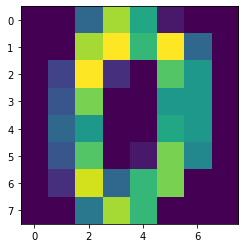

This is supposed to be a '1':


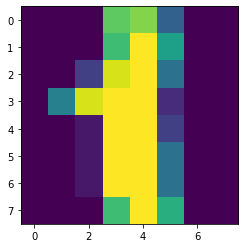

This is supposed to be a '2':


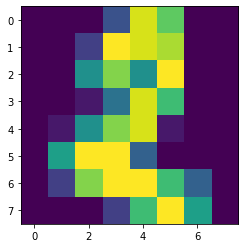

This is supposed to be a '3':


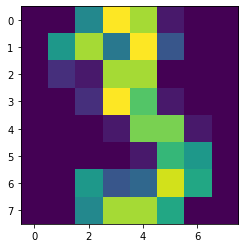

This is supposed to be a '4':


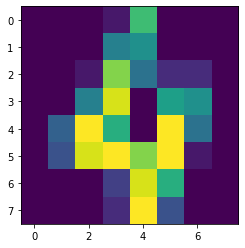

This is supposed to be a '5':


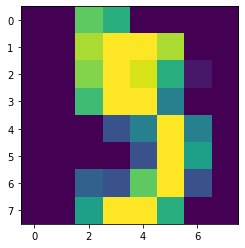

This is supposed to be a '6':


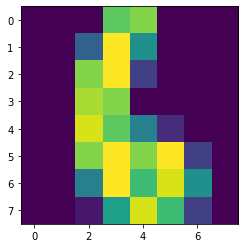

This is supposed to be a '7':


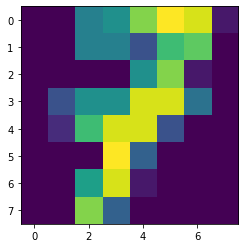

In [24]:
from sklearn.datasets import load_digits 
from sklearn.decomposition import PCA
digits  = load_digits()
X = digits.data / 255.0 
Y = digits.target
print(X.shape, Y.shape,'\n')

# Let's look a a few examples
for i in range(8):  # show 8 examples 
    print("This is supposed to be a '",Y[i],"':",sep="")
    plt.imshow(X[i].reshape([8,8]))
    plt.show()

In [25]:
digits_cov = np.cov(X.T)
print("digits_cov.shape = ",digits_cov.shape)
lambdas, vs = sorted_eig(np.array(digits_cov)) 

W = vs[:,0:2]  # just keep two dimensions
proj_digits = X @ W
print("proj_digits.shape = ", proj_digits.shape)

# Make the plot 
fig = go.Figure(data=[go.Scatter(x=proj_digits[:,0], y=proj_digits[:,1],
                mode='markers', marker=dict(size=6, opacity=0.7, color=Y), text=['digit='+str(j) for j in Y] )])
fig.update_layout( xaxis_title="q_1", yaxis_title="q_2", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.update_layout(scene_camera=dict(up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=0, y=0, z=1.5)))
fig.show()

digits_cov.shape =  (64, 64)
proj_digits.shape =  (1797, 2)


### Reference

[Principal Component Analysis (PCA) from Scratch](https://drscotthawley.github.io/blog/2019/12/21/PCA-From-Scratch.html)
